# Efficiency Plots for 2017 and 2018

Dedicated notebook to produce all efficiency plots (2017 and 2018) to ringer note/paper.

In [1]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop, load_hdf
from core import Efficiency, restore_efficiencies
from Gaugi import mkdir_p, progressbar
import numpy as np
import pandas as pd
import collections
import os
import rootplotlib as rpl
from pprint import pprint
from copy import deepcopy
import gc
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence
INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Applying ATLAS style settings...

Applying ATLAS style settings...

Applying ATLAS style settings...


## 1) Read all files:

In [2]:
output_path = 'output/efficiencies'
mkdir_p(output_path)

In [3]:
eff_data17_Zee_noringer = restore_efficiencies( '../data/output/emulation/data17_Zee_efficiency_noringer.root')

In [4]:
eff_data17_Zee_noringer.triggers

['HLT_e140_lhloose_nod0_noringer',
 'HLT_e17_lhvloose_nod0_noringer_L1EM15VHI',
 'HLT_e28_lhtight_nod0_noringer_ivarloose',
 'HLT_e60_lhmedium_nod0_noringer_L1EM24VHI']

In [5]:
eff_data17_Zee_v8 = restore_efficiencies( 'output/emulation/data17_Zee_efficiency_v8.root')

In [6]:
eff_data17_Zee_v8.triggers

['HLT_e140_lhloose_nod0_ringer_v8',
 'HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI',
 'HLT_e28_lhtight_nod0_ringer_v8_ivarloose',
 'HLT_e60_lhmedium_nod0_ringer_v8_L1EM24VHI']

In [7]:
eff_data17_JF17_noringer = restore_efficiencies( '../data/output/emulation/data17_JF17_efficiency_noringer.root')

In [8]:
eff_data17_JF17_v8 = restore_efficiencies( 'output/emulation/data17_JF17_efficiency_v8.root')

In [9]:
def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=18, option='p' )

## 2) HLT_e28:

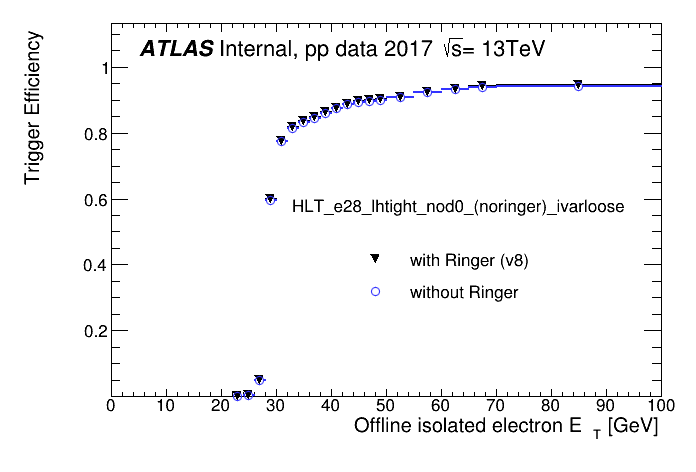

In [10]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'HLT','et'),
            eff_data17_Zee_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35,['with Ringer (v8)', 'without Ringer'] )
rpl.add_text( 0.42, 0.55, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v8_and_noringer_2017_HLT_et.pdf')

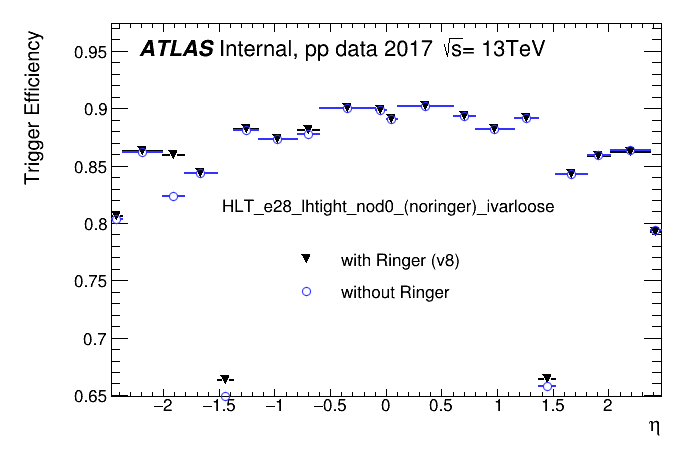

In [11]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'HLT','eta'),
            eff_data17_Zee_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.35,['with Ringer (v8)', 'without Ringer'] )
rpl.add_text( 0.32, 0.55, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.08) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v8_and_noringer_2017_HLT_eta.pdf')

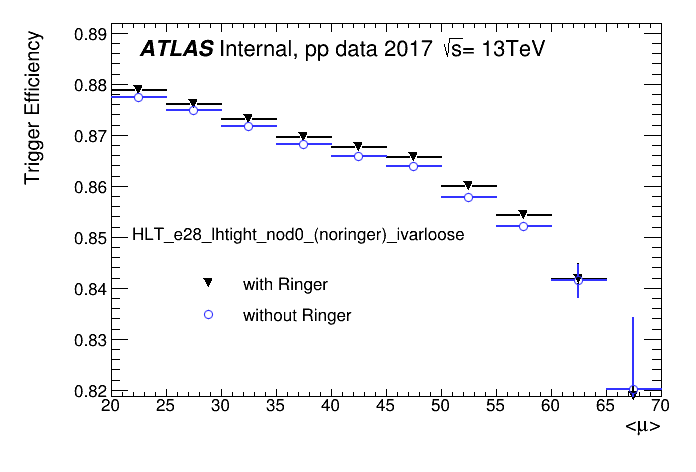

In [12]:
colors = [kBlack,kBlue-4]
markers = [23, 24]

hists = [
            eff_data17_Zee_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'HLT','mu'),
            eff_data17_Zee_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'HLT','mu'),
        ]


hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.25,0.3,['with Ringer', 'without Ringer'] )
rpl.add_text( 0.19, 0.49, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.015) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v8_and_noringer_2017_HLT_mu.pdf')


### 2.1) Check fake rejection for FastCalo step:

**NOTE**: For Run-2, to get the fast-calo boolean, point the histogram to L2

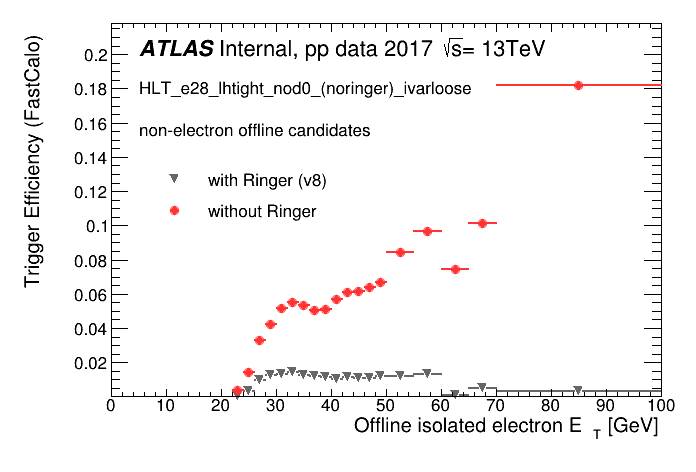

In [13]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'L2Calo','et'),
            eff_data17_JF17_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'L2Calo','et'),
        ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.2, 0.52, ['with Ringer (v8)', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2 )
fig.show()

fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_v8_and_noringer_2017_L2Calo_et.pdf')

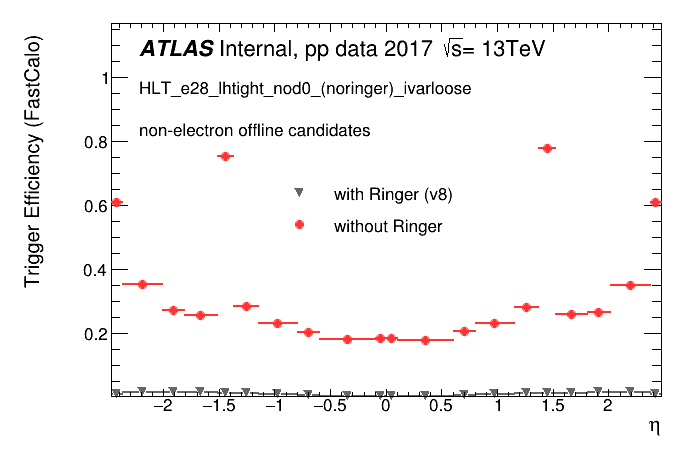

In [14]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'L2Calo','eta'),
            eff_data17_JF17_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'L2Calo','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.38, 0.49, ['with Ringer (v8)', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.5 )
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_v8_and_noringer_2017_L2Calo_eta.pdf')

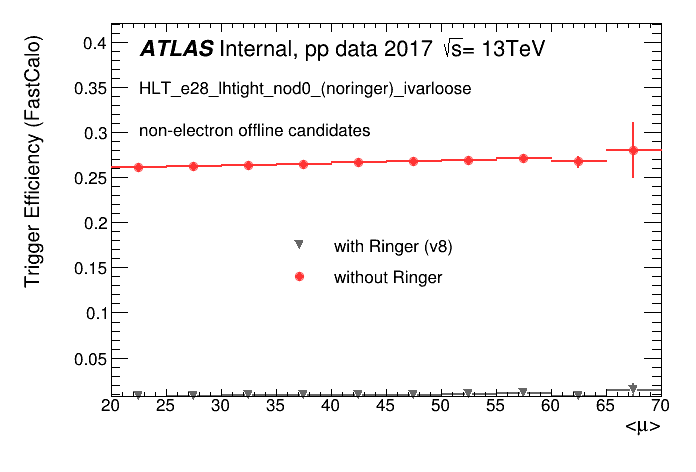

In [15]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'L2Calo','mu'),
            eff_data17_JF17_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'L2Calo','mu'),
        ]

hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.38, 0.38, ['with Ringer (v8)', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.5 )
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_v8_and_noringer_2017_L2Calo_mu.pdf')

In [18]:
eff_data17_JF17_noringer.table('HLT_e28_lhtight_nod0_noringer_ivarloose')

HLT_e28_lhtight_nod0_noringer_ivarloose
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 90.6060  | 8384948/9254300 |
| L2Calo | 26.4611  | 2448794/9254300 |
|   L2   | 26.3965  | 2442814/9254300 |
| EFCalo | 26.0071  | 2406771/9254300 |
|  HLT   |  0.0034  |   313/9254300   |
+--------+----------+-----------------+


In [17]:
eff_data17_JF17_v8.table('HLT_e28_lhtight_nod0_ringer_v8_ivarloose')

HLT_e28_lhtight_nod0_ringer_v8_ivarloose
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 90.6060  | 8384948/9254300 |
| L2Calo |  0.8360  |  77362/9254300  |
|   L2   |  0.7923  |  73320/9254300  |
| EFCalo |  0.6545  |  60568/9254300  |
|  HLT   |  0.0018  |   167/9254300   |
+--------+----------+-----------------+
